<a href="https://colab.research.google.com/github/JinGunseon/FinanceDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B5_%EC%A0%95%EC%83%81_%EC%8B%9C%EA%B3%84%EC%97%B4_%EA%B5%AC%EC%A1%B0_%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stationary Time Series (정상 시계열)

In [1]:
!pip install -q statsmodels
!pip install -q seaborn
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## What is Stationarity (정상성)?

1. constant mean (일정한 평균)  
2. constant variance (일정한 분산)  
3. constant autocorrelation structure (일정한 자기상관)  
4. no periodic component (주기 성분 없음)

In [5]:
print(list(range(50)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [3]:
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [6]:
np.random.normal?

In [2]:
# white noise 생성
np.random.seed(101) # 재현가능한 난수 설정

time = np.arange(500)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [12]:
def plot_sequence(x, y, title):
    plt.figure(figsize=(16,4))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("series value")
    plt.grid(alpha=0.3)
    plt.show()

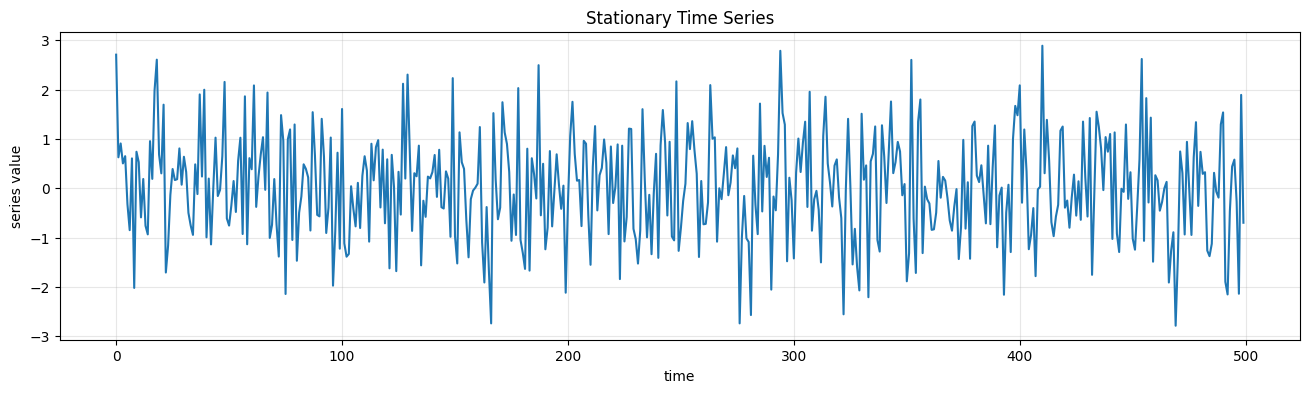

In [13]:
plot_sequence(time, stationary, "Stationary Time Series")

- 위의 플롯에는 뚜렷한 추세나 계절성이 없습니다. 이 시계열 데이터는 4가지 정상성 조건인 일정한 평균, 일정한 분산, 일정한 자기상관, 주기 성분 없음을 충족합니다.  

- 시계열의 histogram 을 plotting 하여 정규분포를 보이면 평균과 분산이 일정하다는 확신을 얻을 수 있습니다.

<Axes: >

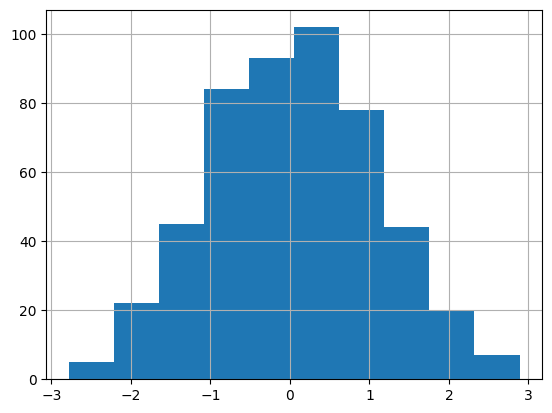

In [15]:
pd.Series(stationary).hist()

## Autocorrelation Structure  (자기 상관 구조)

- 특정 시점(step)이 다른 시점(step)과 수치적 연관성 있음.

- 자기상관성은 difference(차분)에 의해 stationary 로 바꿀 수 있다.

In [19]:
np.empty_like(500, dtype="float").shape

()

In [41]:
# seed to start series
seed = 3.14

# 자기 상관 데이터 생성
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t] #자기 상관성 부여

<ipython-input-41-cc1bedc6c407>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)


시계열이 균일분포 등 비정규분포를 보이면 non-stationay 라고 판단 가능

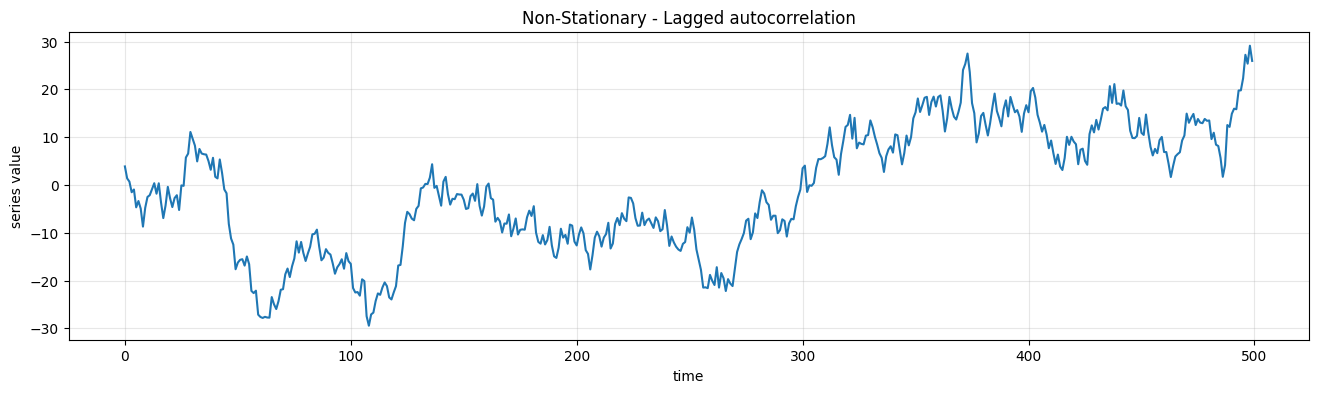

In [42]:
plot_sequence(time, lagged, "Non-Stationary - Lagged autocorrelation")

<Axes: >

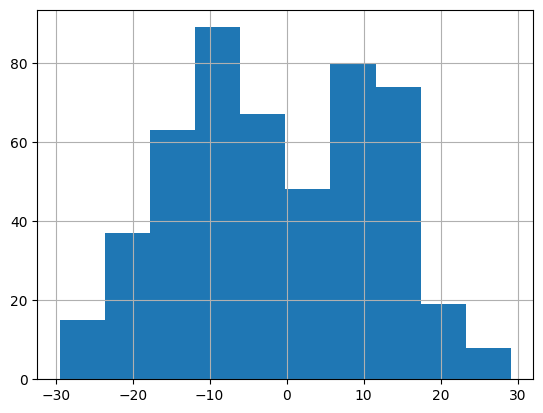

In [43]:
pd.Series(lagged).hist()

## non-stationary (비정상) data의 특징

1. Trend (평균의 변화)가 존재
2. 이분산성(변동 분산)  
3. Seasonality (계절성, 주기적 구성요소)  
4. Trend + Seasonality

### Trend

평균이 시간이 지남에 따라 변하므로 non-stationary

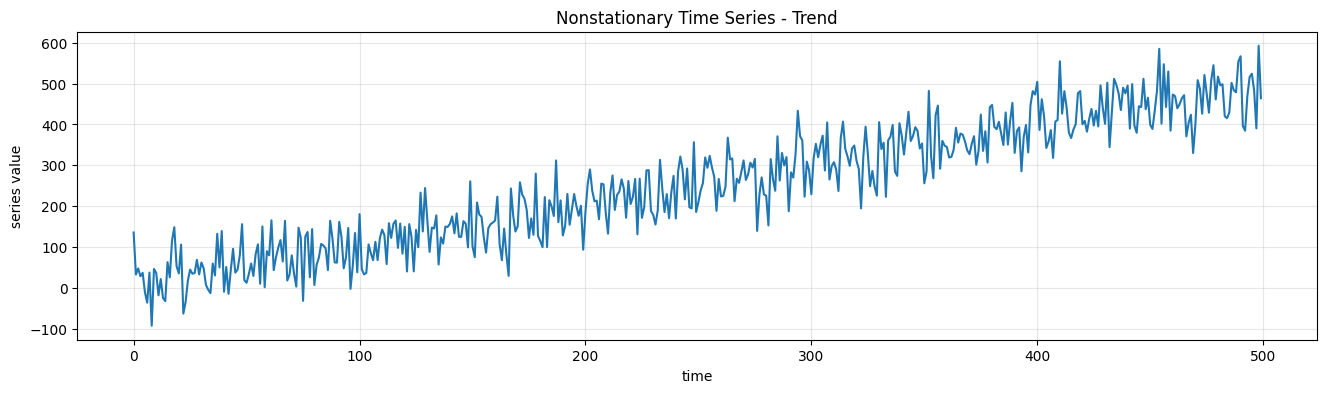

In [44]:
trend = time + stationary * 50

plot_sequence(time, trend, title="Nonstationary Time Series - Trend")

### 이분산성(변동 분산)

시간에 따른 분산의 변화

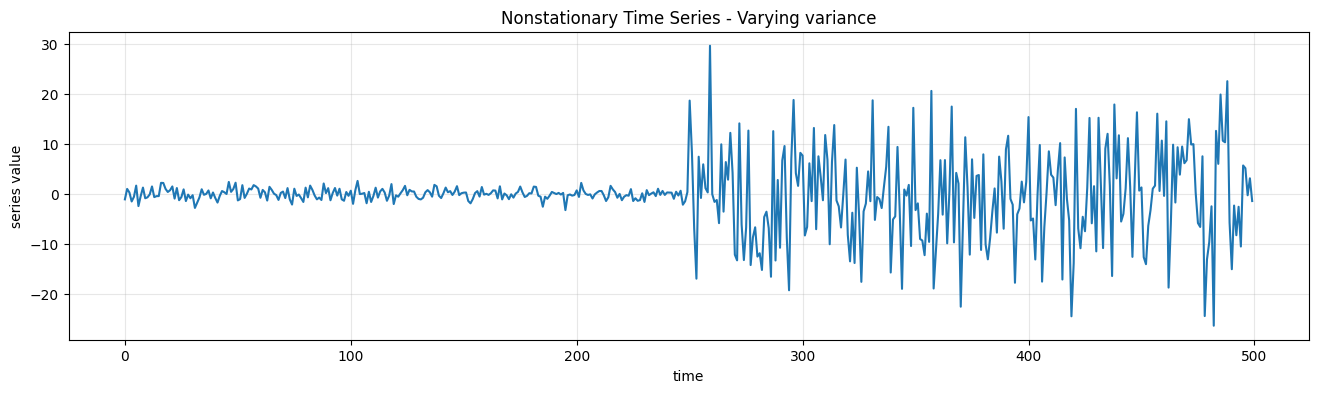

In [45]:
np.random.seed(123)

# 평균 0, 표준편차 1.0인 정규분포에서 250개의 데이터를 생성하여 level_1에 저장합니다.
level_1 = np.random.normal(loc=0, scale=1.0, size=250)

# 평균 0, 표준편차 10.0인 정규분포에서 250개의 데이터를 생성하여 level_2에 저장합니다.
level_2 = np.random.normal(loc=0, scale=10.0, size=250)

# level_1과 level_2 데이터를 합쳐 하나의 배열로 만듭니다.
data = np.append(level_1, level_2)

# 시간과 데이터를 사용하여 비정상적인 시계열 데이터를 플로팅합니다.
# 이 시계열 데이터는 시간에 따라 분산이 달라지는 특징을 가집니다.
plot_sequence(time, data, title="Nonstationary Time Series - Varying variance")

### Seasonality

- 정상 시계열은 시계열이 관측되는 시간에 따라 속성이 달라지지 않는 시계열입니다. 따라서 추세가 있는 시계열 또는 계절성이 있는 시계열은 고정적이지 않습니다. 추세와 계절성은 다른 시간에 시계열 값에 영향을 미칩니다.

- 주기적인 요소가 있으므로 non-stationary

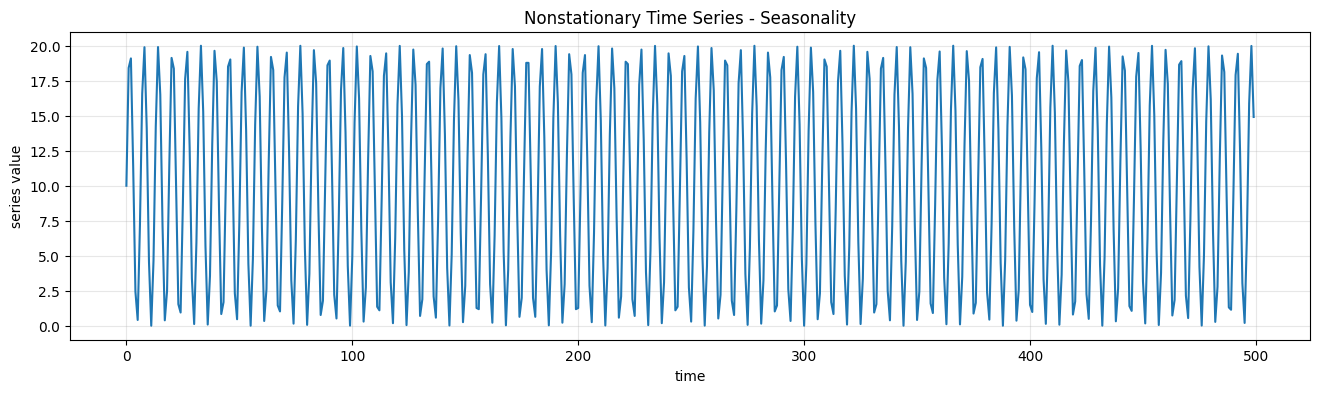

In [46]:
# 계절성(seasonality) 데이터 생성
# time에 따른 sin 함수로 계절성을 만들고, 이를 10으로 스케일링한 뒤 기본값으로 10을 더해 줍니다.
seasonality = 10 + np.sin(time) * 10

# 생성된 계절성 데이터를 시간과 함께 플로팅합니다.
# 이 시계열 데이터는 주기적인 패턴(계절성)을 나타냅니다.
plot_sequence(time, seasonality,
              title="Nonstationary Time Series - Seasonality")

### Trend + Seasonality

평균이 시간이 지남에 따라 변하고 주기적인 구성 요소가 있으므로 non-stationary

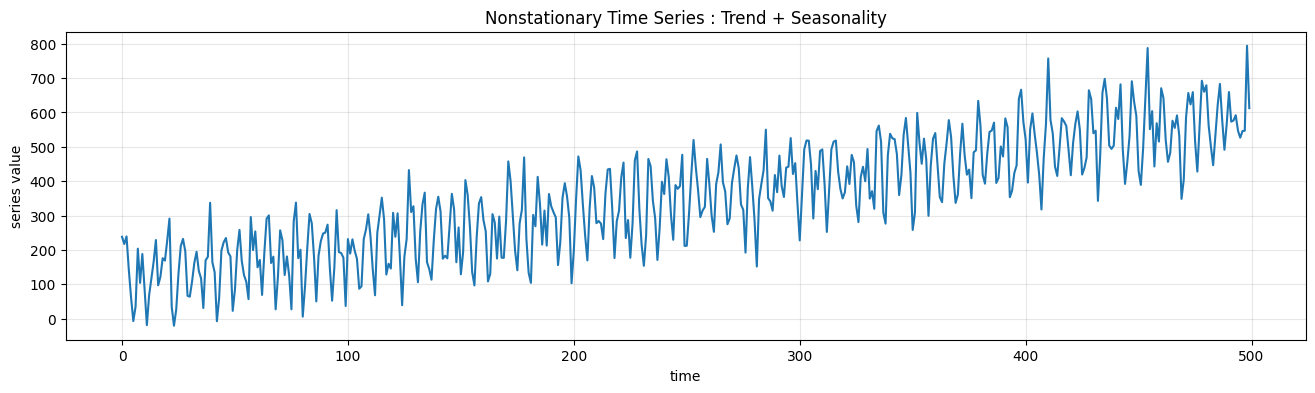

In [47]:
# 트렌드, 계절성, 정상성 데이터를 결합한 시계열 데이터 생성
# 기존의 트렌드(trend)에 계절성(seasonality)을 10배 스케일링하여 더하고,
# 정상성(stationary) 데이터를 더하여 트렌드 + 계절성 + 정상성을 가진 시계열을 만듭니다.
trend_seasonality = trend + seasonality * 10 + stationary

# 생성된 트렌드와 계절성을 포함한 시계열 데이터를 시간과 함께 플로팅합니다.
# 그래프 제목은 "Nonstationary Time Series : Trend + Seasonality"로 설정합니다.
plot_sequence(time, trend_seasonality,
              title="Nonstationary Time Series : Trend + Seasonality")

### autocorrelation + trend

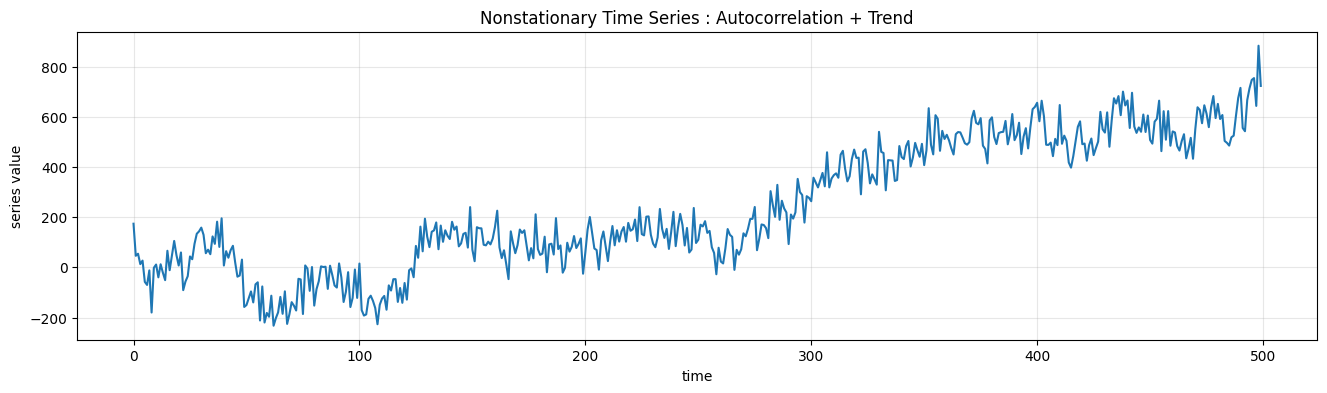

In [48]:
# 자기상관(autocorrelation)과 트렌드를 결합한 시계열 데이터 생성
# 기존의 트렌드(trend)에 자기상관(lagged)을 10배 스케일링하여 더한 시계열 데이터를 만듭니다.
auto_correlation = lagged * 10 + trend

# 생성된 자기상관과 트렌드를 포함한 시계열 데이터를 시간과 함께 플로팅합니다.
# 그래프 제목은 "Nonstationary Time Series : Autocorrelation + Trend"로 설정합니다.
plot_sequence(time, auto_correlation,
              title="Nonstationary Time Series : Autocorrelation + Trend")

### Regime changes

regime change 는 structural break 라고도 하며 data 생성 과정에 변화가 생겨 다른 분포를 만들 때를 뜻한다. 아래의 예는 regime change 가 있어서 전체 data set 을 regression 하는 것보다 data 를 쪼개는 것이 더 잘 맞는 경우를 보여준다. 이런 경우 기저에 깔린 시스템이 변하였으므로 model 이 regime change 이후의 data 에는 더 이상 predictive 하지 못한다.

따라서, 주식 시장에 공식을 적용할 때는 regime change 여부를 매번 검증해야 한다.

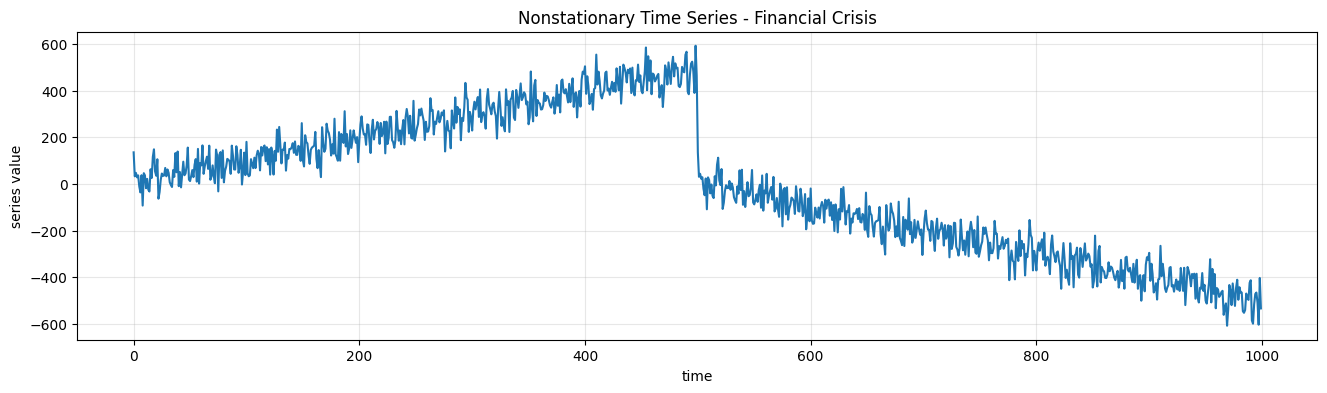

In [49]:
# 시간(time)의 크기를 두 배로 늘린 새로운 시간(time2) 배열을 생성합니다.
time2 = np.arange(time.size * 2)

# 새로운 트렌드(trend2)를 생성합니다. 시간에 음의 상관관계를 가진 트렌드에 정상성(stationary) 데이터를 50배 스케일링하여 더합니다.
trend2 = -time + stationary * 50

# 기존의 트렌드(trend)와 새로운 트렌드(trend2)를 결합하여 금융 위기 시나리오를 나타내는 시계열 데이터를 만듭니다.
financial_crisis = np.append(trend, trend2)

# 생성된 금융 위기 시나리오 데이터를 시간(time2)과 함께 플로팅합니다.
# 그래프 제목을 "Nonstationary Time Series - Financial Crisis"로 설정합니다.
plot_sequence(time2, financial_crisis,
              title="Nonstationary Time Series - Financial Crisis")

## Differencing 으로 Autocorrelation 제거

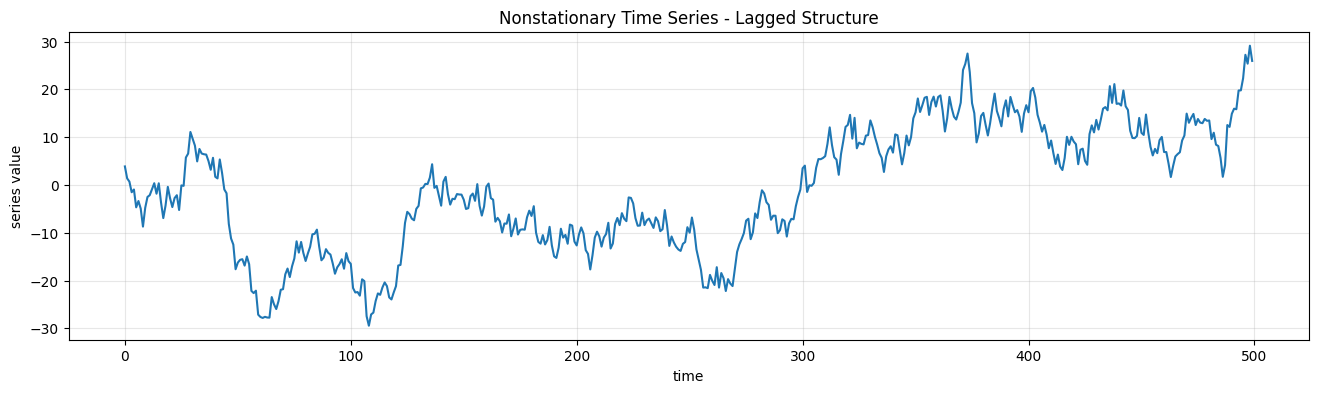

In [50]:
# 시간(time)과 지연된(lagged) 구조 데이터를 사용하여 시계열을 플로팅합니다.
# 이 시계열 데이터는 지연된 패턴을 포함하고 있습니다.
plot_sequence(time, lagged,
              title="Nonstationary Time Series - Lagged Structure")

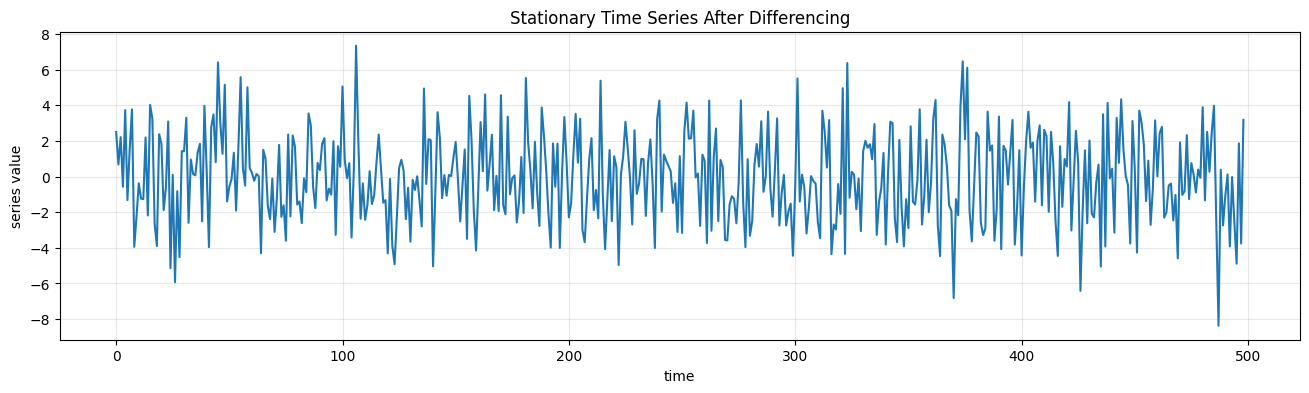

In [51]:
# 지연된(lagged) 데이터에서 차분을 구합니다.
# 첫 번째 값부터 끝에서 하나 전까지의 값에서 두 번째 값부터 마지막 값까지의 차이를 계산하여 차분(difference)을 생성합니다.
difference = lagged[:-1] - lagged[1:]

# 차분한 데이터를 시간(time)의 첫 번째 값부터 끝에서 하나 전까지의 시간과 함께 플로팅합니다.
# 이 시계열 데이터는 차분을 통해 정상적인 시계열로 변환된 모습을 보여줍니다.
plot_sequence(time[:-1], difference,
              title="Stationary Time Series After Differencing")

<Axes: >

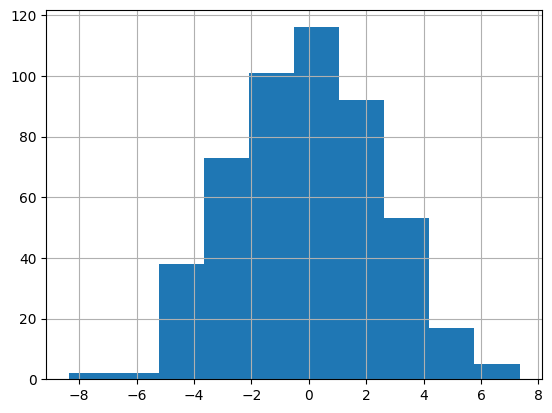

In [52]:
pd.Series(difference).hist()

## pandas autocorrelation_plot

- Time series 가 random 한 경우 autocorrelation 은 모든 time-lag 에서 zero 에 가까워야 함  

- Time series 가 non-random 한 경우 하나 이상의 autocorrelation 이 크게 non-zero 값을 보임  

- 플롯의 수평선은 95% 및 99% 신뢰 대역에 해당. 점선은 99% 신뢰 구간.

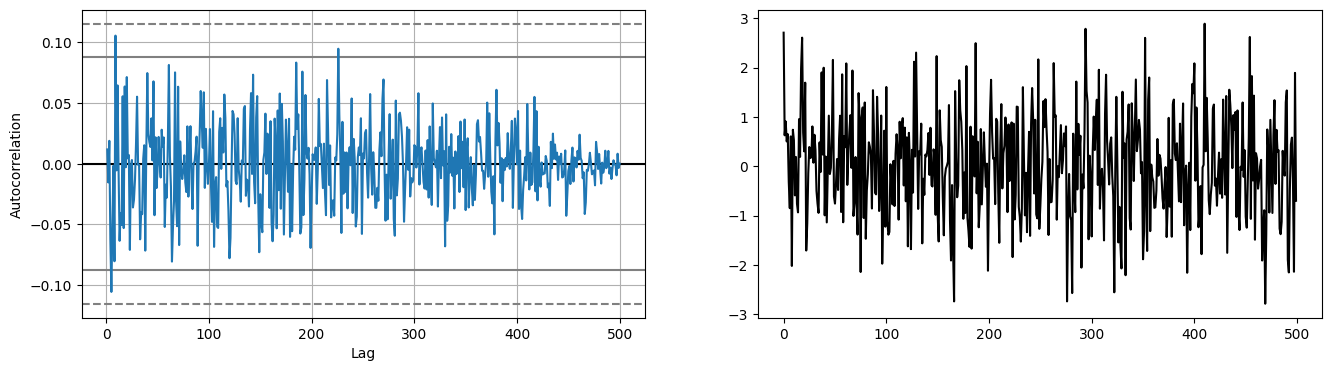

In [53]:
from pandas.plotting import autocorrelation_plot

# 정상성 데이터를 시각화
# 두 개의 서브플롯을 생성합니다. fig는 전체 그림을 나타내며, ax1과 ax2는 각 서브플롯을 의미합니다.
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# # 첫 번째 서브플롯(ax1)에서는 정상성 데이터를 기반으로 한 자기상관(autocorrelation)을 시각화합니다.
# autocorrelation_plot(stationary, ax=ax1)

# # 두 번째 서브플롯(ax2)에서는 정상성 데이터를 'k-'(검은색 실선)으로 플로팅합니다.
# ax2.plot(stationary, 'k-')

# plt.show()

평균을 중심으로 분산이 일정한 경우 stationary한 데이터라고 할 수 있다.

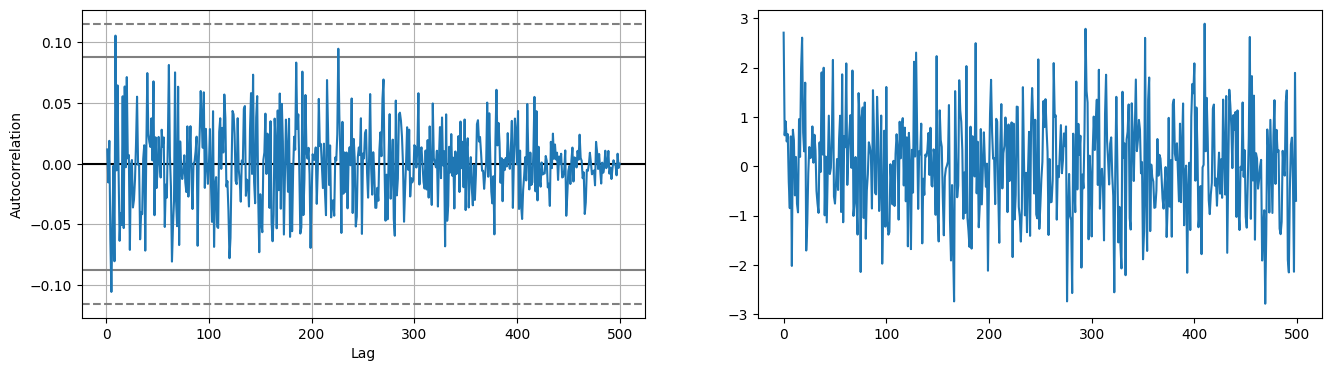

In [56]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
autocorrelation_plot(stationary, ax=ax1)
ax2.plot(stationary)

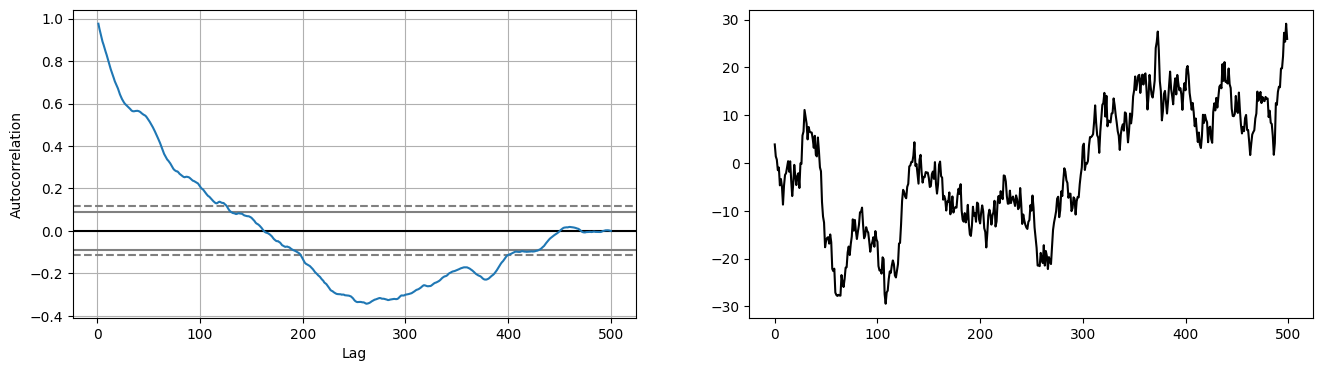

In [57]:
# 자기 상관 데이터를 시각화
# 두 개의 서브플롯을 생성합니다. fig는 전체 그림을 나타내며, ax1과 ax2는 각각의 서브플롯을 의미합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 서브플롯(ax1)에서는 lagged 데이터를 기반으로 한 자기상관(autocorrelation)을 시각화합니다.
autocorrelation_plot(lagged, ax=ax1)

# 두 번째 서브플롯(ax2)에서는 lagged 데이터를 'k-'(검은색 실선)으로 플로팅합니다.
ax2.plot(lagged, 'k-')

plt.show()

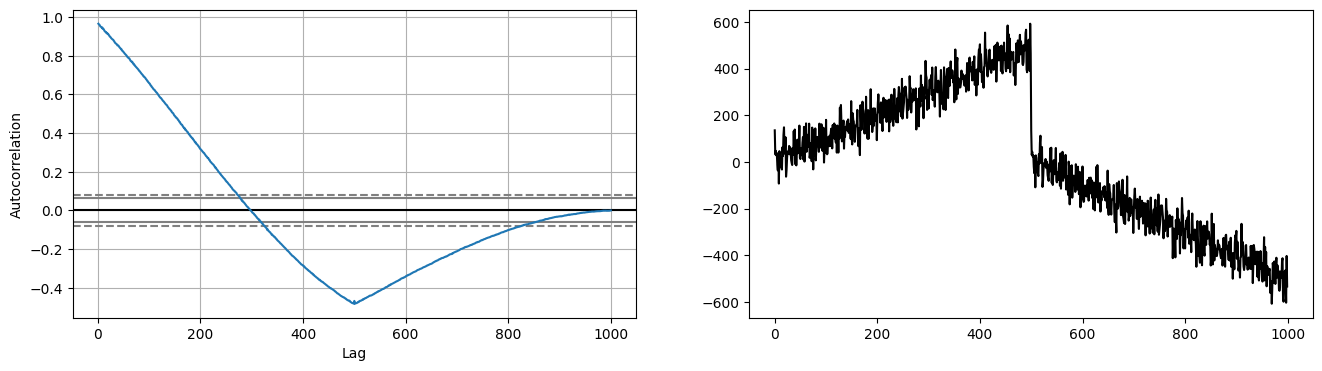

In [58]:
# 금융 위기 시나리오 데이터를 시각화
# 두 개의 서브플롯을 생성합니다. fig는 전체 그림을 나타내며, ax1과 ax2는 각각의 서브플롯을 의미합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 서브플롯(ax1)에서는 financial_crisis 데이터를 기반으로 한 자기상관(autocorrelation)을 시각화합니다.
autocorrelation_plot(financial_crisis, ax=ax1)

# 두 번째 서브플롯(ax2)에서는 financial_crisis 데이터를 'k-'(검은색 실선)으로 플로팅합니다.
ax2.plot(financial_crisis, 'k-')

plt.show()

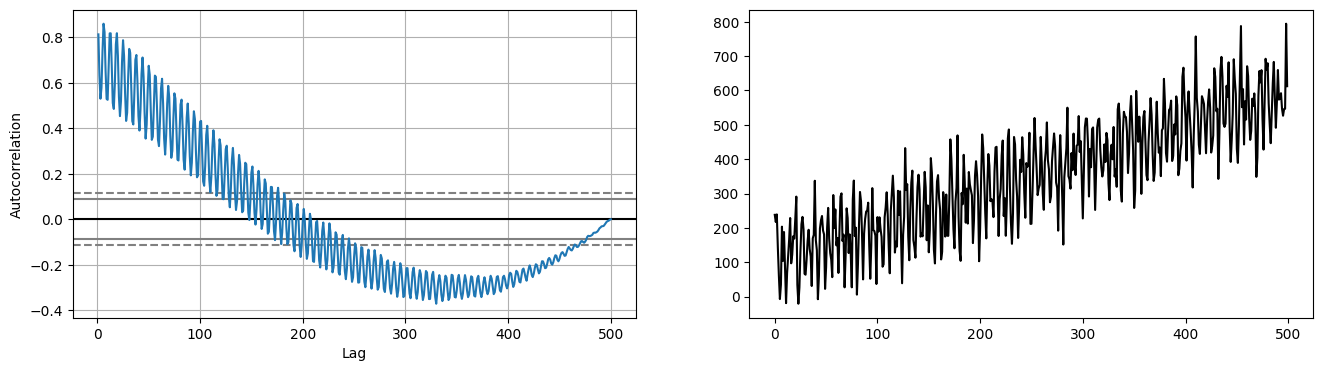

In [59]:
# 트렌드와 계절성 데이터(trend_seasonality)를 시각화
# 두 개의 서브플롯을 생성합니다. fig는 전체 그림을 나타내며, ax1과 ax2는 각각의 서브플롯을 의미합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 서브플롯(ax1)에서는 trend_seasonality 데이터를 기반으로 한 자기상관(autocorrelation)을 시각화합니다.
autocorrelation_plot(trend_seasonality, ax=ax1)

# 두 번째 서브플롯(ax2)에서는 trend_seasonality 데이터를 'k-'(검은색 실선)으로 플로팅합니다.
ax2.plot(trend_seasonality, 'k-')

plt.show()